In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns                 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

C:\Users\TARANYA SIMHADRI\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv') 

In [3]:
data.describe() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
data.isnull().sum()  

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
data.corr()['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [6]:
plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

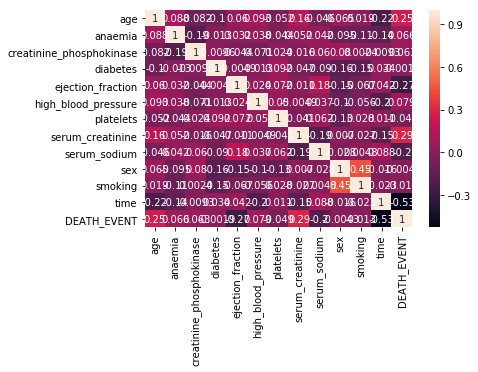

In [7]:
sns.heatmap(data.corr(), annot=True)

In [8]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=29)

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
# Train the classifier using cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
mean_cross_val_accuracy = cross_val_scores.mean()

In [12]:
# Train the classifier on the full training set
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [13]:
# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

In [14]:
# Evaluate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy (Before Cross-Validation): {accuracy:.4f}")

Accuracy (Before Cross-Validation): 0.8500


In [18]:
# Display Cross-Validation Mean Accuracy
print(f"Cross-Validation Mean Accuracy: {mean_cross_val_accuracy:.4f}")


Cross-Validation Mean Accuracy: 0.8326


In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[144  23]
 [ 13  60]]


In [20]:
# AUC-ROC Curve
y_proba = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

In [21]:
plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

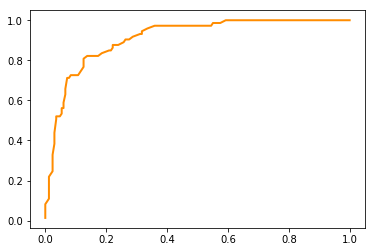

In [22]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))

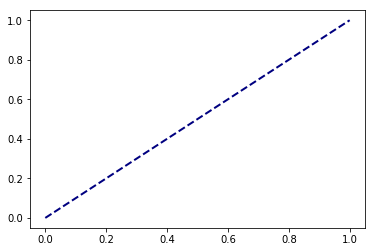

In [23]:
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

Text(0.5,0,'False Positive Rate')

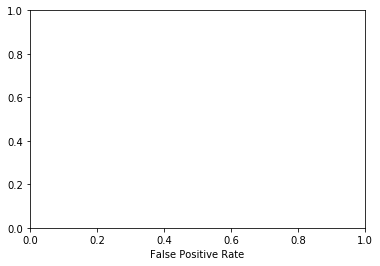

In [24]:
plt.xlabel('False Positive Rate')

Text(0,0.5,'True Positive Rate')

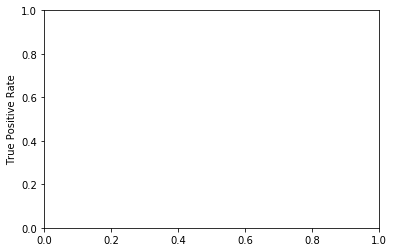

In [25]:
plt.ylabel('True Positive Rate')

Text(0.5,1,'Receiver Operating Characteristic (ROC) Curve')

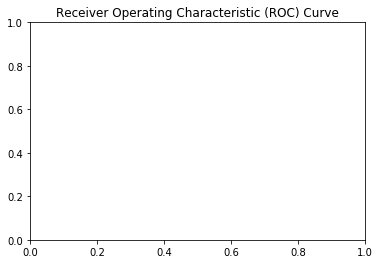

In [26]:
plt.title('Receiver Operating Characteristic (ROC) Curve')

No handles with labels found to put in legend.


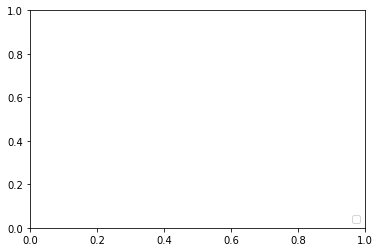

In [29]:
plt.legend(loc='lower right')
plt.show()

In [32]:
from sklearn.metrics import log_loss

In [33]:
# Accuracy and Log Loss Curves during Training
train_acc = []
test_acc = []
train_logloss = []
test_logloss = []


In [34]:
for n_estimators in range(1, 101):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Training Accuracy and Log Loss
    train_preds = rf_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)
    train_log_loss = log_loss(y_train, rf_classifier.predict_proba(X_train))

    # Test Accuracy and Log Loss
    test_preds = rf_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_preds)
    test_log_loss = log_loss(y_test, rf_classifier.predict_proba(X_test))

    # Append values
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    train_logloss.append(train_log_loss)
    test_logloss.append(test_log_loss)

In [35]:
# Plotting Accuracy Curves
plt.figure(figsize=(12, 4))

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

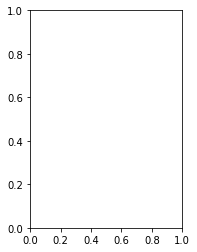

In [36]:
plt.subplot(1, 2, 1)

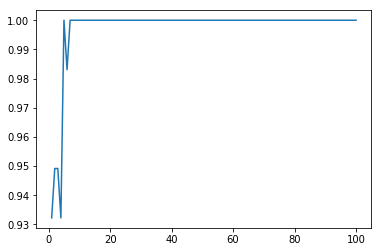

In [37]:
plt.plot(range(1, 101), train_acc, label='Training Accuracy')

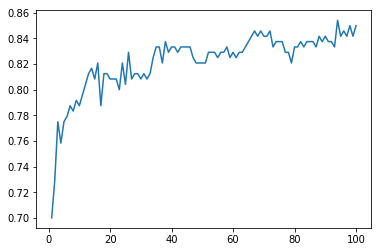

In [38]:
plt.plot(range(1, 101), test_acc, label='Testing Accuracy')

Text(0.5,0,'Number of Trees (n_estimators)')

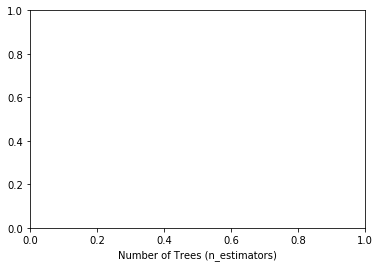

In [39]:
plt.xlabel('Number of Trees (n_estimators)')

Text(0,0.5,'Accuracy')

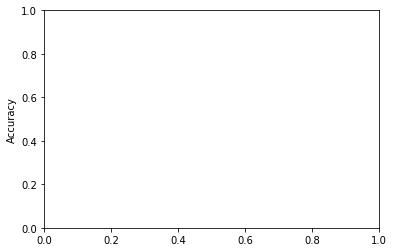

In [40]:
plt.ylabel('Accuracy')

No handles with labels found to put in legend.


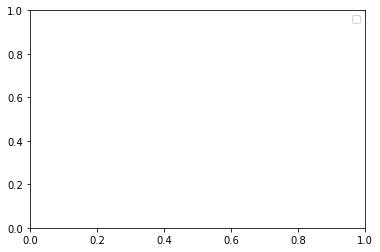

In [41]:
plt.legend()

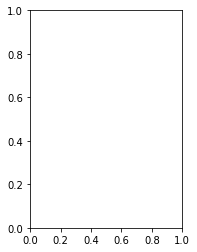

In [42]:
# Plotting Log Loss Curves
plt.subplot(1, 2, 2)

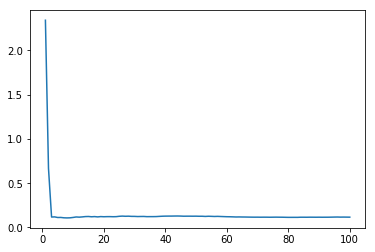

In [43]:
plt.plot(range(1, 101), train_logloss, label='Training Log Loss')

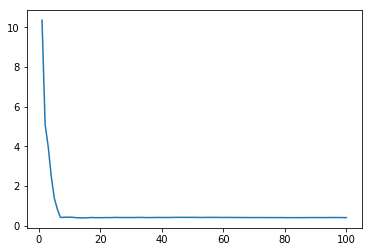

In [44]:
plt.plot(range(1, 101), test_logloss, label='Testing Log Loss')

Text(0.5,0,'Number of Trees (n_estimators)')

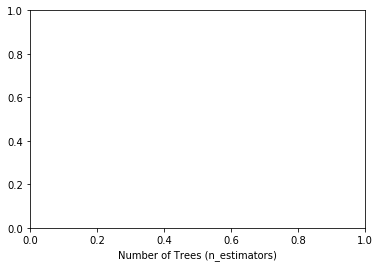

In [45]:
plt.xlabel('Number of Trees (n_estimators)')

Text(0,0.5,'Log Loss')

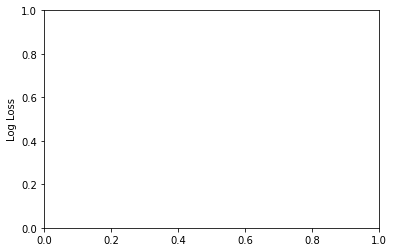

In [46]:
plt.ylabel('Log Loss')

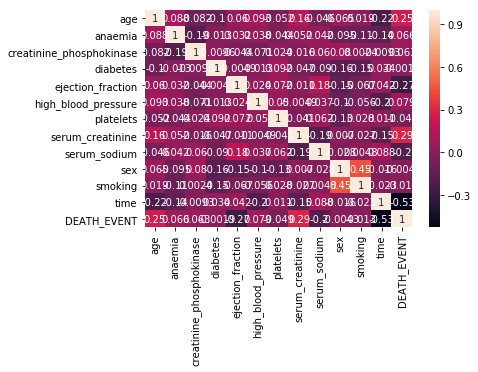

In [52]:
sns.heatmap(data.corr(), annot=True)

In [53]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy (Before Cross-Validation): {accuracy:.4f}")

Accuracy (Before Cross-Validation): 0.8500


In [54]:
# Display Cross-Validation Mean Accuracy
print(f"Cross-Validation Mean Accuracy: {mean_cross_val_accuracy:.4f}")

Cross-Validation Mean Accuracy: 0.8326
